### This Project is for the Applied Data Science Capstone



### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. 

### Regression Task:
- Applied all the regression models. Used Grid Search to find the best scaling parameter. Used plots and graphs to help get a better glimpse of the results. 
- Used cross validation to find average training and testing score. 
- Found the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.
- Performed evaluation for the regression models.

### Classification task:
- Found the best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Performed evaluation for the classification models.



---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Merged these two datasets into one dataframe. 
Considered ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Reading the the audit_risk and trial csv.

In [2]:
audit_df = pd.read_csv("C:/Users/Supriya/Documents/2nd Semester/Machine Learning/Project/audit_risk.csv")
trial_df = pd.read_csv("C:/Users/Supriya/Documents/2nd Semester/Machine Learning/Project/trial.csv")



In [3]:
audit_df
audit_df.T

,0,1,2,3,4,5,6,7,8,9,...,766,767,768,769,770,771,772,773,774,775
Sector_score,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,3.89,...,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57,55.57
LOCATION_ID,23,6,6,6,6,6,7,8,8,8,...,8,18,9,16,18,9,16,14,18,15
PARA_A,4.18,0,0.51,0,0,0,1.1,8.5,8.4,3.98,...,0.8,0.36,0.44,0.51,0.75,0.49,0.47,0.24,0.2,0
Score_A,0.6,0.2,0.2,0.2,0.2,0.2,0.4,0.6,0.6,0.6,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_A,2.508,0,0.102,0,0,0,0.44,5.1,5.04,2.388,...,0.16,0.072,0.088,0.102,0.15,0.098,0.094,0.048,0.04,0
PARA_B,2.5,4.83,0.23,10.8,0.08,0.83,7.41,12.03,11.05,0.99,...,0.57,0.54,0.53,0.5,0.45,0.4,0.37,0.04,0,0
Score_B,0.2,0.2,0.2,0.6,0.2,0.2,0.4,0.6,0.6,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Risk_B,0.5,0.966,0.046,6.48,0.016,0.166,2.964,7.218,6.63,0.198,...,0.114,0.108,0.106,0.1,0.09,0.08,0.074,0.008,0,0
TOTAL,6.68,4.83,0.74,10.8,0.08,0.83,8.51,20.53,19.45,4.97,...,1.37,0.9,0.97,1.01,1.2,0.89,0.84,0.28,0.2,0
numbers,5,5,5,6,5,5,5,5.5,5.5,5,...,5,5,5,5,5,5,5,5,5,5


It is observed that there are two columns with the same name but with different letter case. This might create ambiguity when the data is being merged as the columns are all converted to the upper case before merging. This is the reason PROB is being renamed to PROB_1

In [4]:
audit_df.rename(columns={'PROB': 'PROB_1'}, inplace=True)

In [5]:
print(audit_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB_1',
       'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


### Observation 1: Detection_Risk is a constant value 

Dropping the Detection Risk column as it has a variance of zero.

In [6]:
audit_df = audit_df.drop("Detection_Risk", axis = 1)

In [7]:
trial_df.T
trial_df['Risk'].unique()

array([1, 0], dtype=int64)

### Observation 2: SCORE_A and SCORE_B in trial_df are 10* Score_A and 10*Score_B of audit_risk_df

In [8]:
audit_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB_1,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


In [9]:
trial_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0


In [10]:
audit_df["Money_Value"].head(2)

0    3.38
1    0.94
Name: Money_Value, dtype: float64

### Observation 3: If the Score_A and Score_B values are adjusted, all common columns except 'Risk' hold the same value with the df observations in the same sequence

Common columns:
The common columns are the columns which are present both in audit_df and trial_df dataframes.
common_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']
       
Columns present in trial_df but not in audit_risk_df:

only_trial_cols = ['Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score']

In [11]:
audit_df["Score_A"] = audit_df["Score_A"]*10
audit_df["Score_B"] = audit_df["Score_B"]*10

The columns of both the dataframes which are audit_df and trial_df are converted to upeer case as it would be appropriate while merging as there are columns which are common to both the dataframes.

In [12]:


common_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
common_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
common_with_risk_cols_upper = [x.upper() for x in common_with_risk_cols]
common_without_risk_cols_upper = [x.upper() for x in common_without_risk_cols]

audit_cols = audit_df.columns
audit_cols_upper =  [x.upper() for x in audit_cols]
audit_df.columns = audit_cols_upper

trial_cols = trial_df.columns
trial_cols_upper =  [x.upper() for x in trial_cols]
trial_df.columns = trial_cols_upper



### Merging the two dataframes

It is observed that when the inner merge is performed which the common columns (which is common_with_risk_cols) then it results in 629 onbservations and results to 580 upon dropping the duplicates.
In contrast when the merging is done without the consideration of risk column (i.e., using the common_without_risk_cols), it would result in 776 observations and 763 upon dropping the duplicates.
Here the merging is done without the consideration of the risk column ( i.e., the second way).

In [13]:
merged_df = audit_df.merge(trial_df, on=common_without_risk_cols_upper)
merged_df.shape

merged_df = merged_df.drop_duplicates()
merged_df.shape

(763, 33)

In [14]:
merged_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1',
       'RISK_E', 'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK',
       'CONTROL_RISK', 'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS',
       'DISTRICT', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

### Observation 4:  Central Imputation 

######  In the MONEY_VALUE feature it is observed that there is  one null value present. So central imputation is done where the null value is replaced by the mean of the values of that feature.

In [15]:
 ##Central Imputation

merged_df['MONEY_VALUE'] = merged_df["MONEY_VALUE"].fillna(merged_df["MONEY_VALUE"].mean())

merged_df.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB_1           0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK_x           0
MARKS            0
MONEY_MARKS      0
DISTRICT         0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
RISK_y           0
dtype: int64

### Observation 5: Type conversion

Location ID that holds three string values and rest in the form of numeric values is a categorical attribute

In [16]:
merged_df = merged_df.copy()
merged_df[['LOCATION_ID']] = merged_df[['LOCATION_ID']].astype('category')

# Check type conversions
merged_df.dtypes

SECTOR_SCORE      float64
LOCATION_ID      category
PARA_A            float64
SCORE_A           float64
RISK_A            float64
PARA_B            float64
SCORE_B           float64
RISK_B            float64
TOTAL             float64
NUMBERS           float64
SCORE_B.1         float64
RISK_C            float64
MONEY_VALUE       float64
SCORE_MV          float64
RISK_D            float64
DISTRICT_LOSS       int64
PROB_1            float64
RISK_E            float64
HISTORY             int64
PROB              float64
RISK_F            float64
SCORE             float64
INHERENT_RISK     float64
CONTROL_RISK      float64
AUDIT_RISK        float64
RISK_x              int64
MARKS               int64
MONEY_MARKS         int64
DISTRICT            int64
LOSS                int64
LOSS_SCORE          int64
HISTORY_SCORE       int64
RISK_y              int64
dtype: object

   Here since there are 3 string values for LOCATION_ID which are replaced with a unique numbers.

In [17]:
merged_df["LOCATION_ID"]= merged_df["LOCATION_ID"].replace("LOHARU", 45)
merged_df["LOCATION_ID"]= merged_df["LOCATION_ID"].replace("NUH", 46)
merged_df["LOCATION_ID"]= merged_df["LOCATION_ID"].replace("SAFIDON", 47)

## Observation:6 Outliers

#### Analyzation of  the outliers and removing them.

In [18]:
merged_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


Here in the above description it is observed that some of the columns like PARA_B, TOTAL, RSIK_B are having the outliers as their respective maximum values are greater than the value of their 3rd quartile. Hence there are outliers present for these columns.

###### Plotting the boxplot to observe the outliers. 


{'whiskers': [<matplotlib.lines.Line2D at 0x1b1f4b50198>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1f4b50828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1f4b50048>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1f4b50eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1f4b5f240>],
 'means': []}

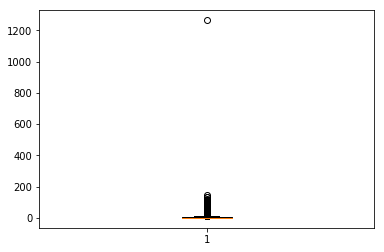

In [19]:
plt.boxplot(merged_df['PARA_B'])

Here we observe that there is only one observation which is the outlier for the column PARA_B.

In [20]:
merged_df[merged_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [21]:
merged_df.shape

(763, 33)

##### Removing the outlier for the PARA_B column

In [22]:
merged_out =merged_df[merged_df.PARA_B != 1264.630000]

###### In the below boxplot it is observed that there are no more outliers for PARA_B column

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1f4bd9320>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1f4bd99e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1f4bd91d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1f4be30b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1f4be3400>],
 'means': []}

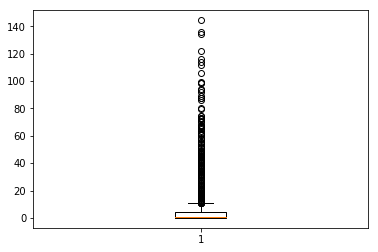

In [23]:
plt.boxplot(merged_out['PARA_B'])

In [24]:
merged_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


##### Removing the rest of the outliers

In [25]:
merged_out[(merged_out['INHERENT_RISK'] == 622.838000) | (merged_out['TOTAL'] == 191.360000) | (merged_out['MONEY_VALUE'] == 935.030000) |(merged_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [26]:
final_data = merged_out[(merged_out['INHERENT_RISK'] != 622.838000) & (merged_out['TOTAL'] != 191.360000) & (merged_out['MONEY_VALUE'] != 935.030000) & (merged_out['RISK_D'] != 561.018000)]

In [27]:
final_data

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,0.4,1.714800,1,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,0.4,0.510800,0,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,0.4,0.309600,0,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,0.4,3.506000,1,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,0.4,0.283200,0,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,0.4,0.431200,0,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,0.4,6.354800,1,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,0.4,3.606800,1,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,0.4,3.441200,1,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,0.4,0.874400,0,2,2,2,0,2,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1b1f4c3d400>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1f4c5b0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1f4c3d2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b1f4c5b780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b1f4c5bac8>],
 'means': []}

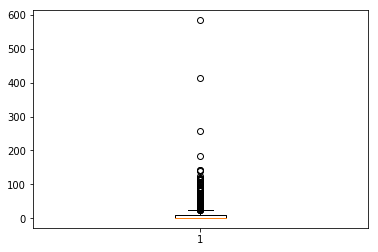

In [28]:
plt.boxplot(final_data['INHERENT_RISK'])

In [29]:
final_data.shape

(760, 33)

### Observation 7: 

Here it is observed that on merging the two dataframes there would be two columns formed for the risk as the risk columns and values are different for both the dataframes. Hence by performing the OR operation the RISK column is built.  

In [30]:
final_data['RISK'] = final_data['RISK_x'] | final_data['RISK_y']

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
final_data = final_data.drop(['RISK_x','RISK_y'],axis=1)

In [32]:
final_data

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,8.57400,0.4,1.714800,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,2.55400,0.4,0.510800,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,1.54800,0.4,0.309600,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,17.53000,0.4,3.506000,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,1.41600,0.4,0.283200,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,2.15600,0.4,0.431200,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,31.77400,0.4,6.354800,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,18.03400,0.4,3.606800,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,17.20600,0.4,3.441200,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,4.37200,0.4,0.874400,2,2,2,0,2,2,1


In [33]:
final_data.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.634211
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.481968
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
SECTOR_SCORE     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
RISK_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
RISK_B           760 non-null float64
TOTAL            760 non-null float64
NUMBERS          760 non-null float64
SCORE_B.1        760 non-null float64
RISK_C           760 non-null float64
MONEY_VALUE      760 non-null float64
SCORE_MV         760 non-null float64
RISK_D           760 non-null float64
DISTRICT_LOSS    760 non-null int64
PROB_1           760 non-null float64
RISK_E           760 non-null float64
HISTORY          760 non-null int64
PROB             760 non-null float64
RISK_F           760 non-null float64
SCORE            760 non-null float64
INHERENT_RISK    760 non-null float64
CONTROL_RISK     760 non-n

In [35]:
import pandas as pd
import numpy as np


In [36]:
final_data.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1',
       'RISK_E', 'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK',
       'CONTROL_RISK', 'AUDIT_RISK', 'MARKS', 'MONEY_MARKS', 'DISTRICT',
       'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

### Observation 8

It is observed that District loss and district have the same values and same affect on the target so dropping one of the two attributes (which is DISTRICT) is done.
It is also observed that MONEY_Marks and Score_MV differ by a constant factor which is the multiplication of 10 (i.e., SCORE_MV*10 is \MONEY_MARKS), so dropping the MONEY_MARKS attribute.  

In [37]:
final_data = final_data.drop(['MONEY_MARKS','DISTRICT'],axis=1)

In [38]:
final_data.columns


Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1',
       'RISK_E', 'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK',
       'CONTROL_RISK', 'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE', 'RISK'],
      dtype='object')

## Visualizations

##### Plotting the Sector_score vs Risk
Here it is observed that the Risk is 1 for the sector_score between 2.72 and 3.89

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

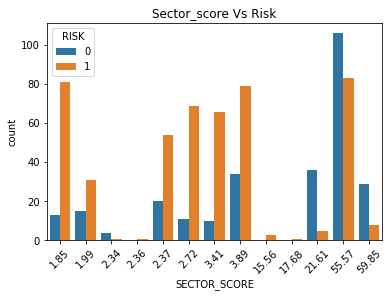

In [39]:
sns.countplot(x='SECTOR_SCORE',data=final_data[['SECTOR_SCORE','RISK']],
              hue="RISK").set_title("Sector_score Vs Risk")
plt.xticks(rotation=45)

#### Plotting of Risk for location_id
It can be observed that the risk is 1 for location with id 8,23,2, and 16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

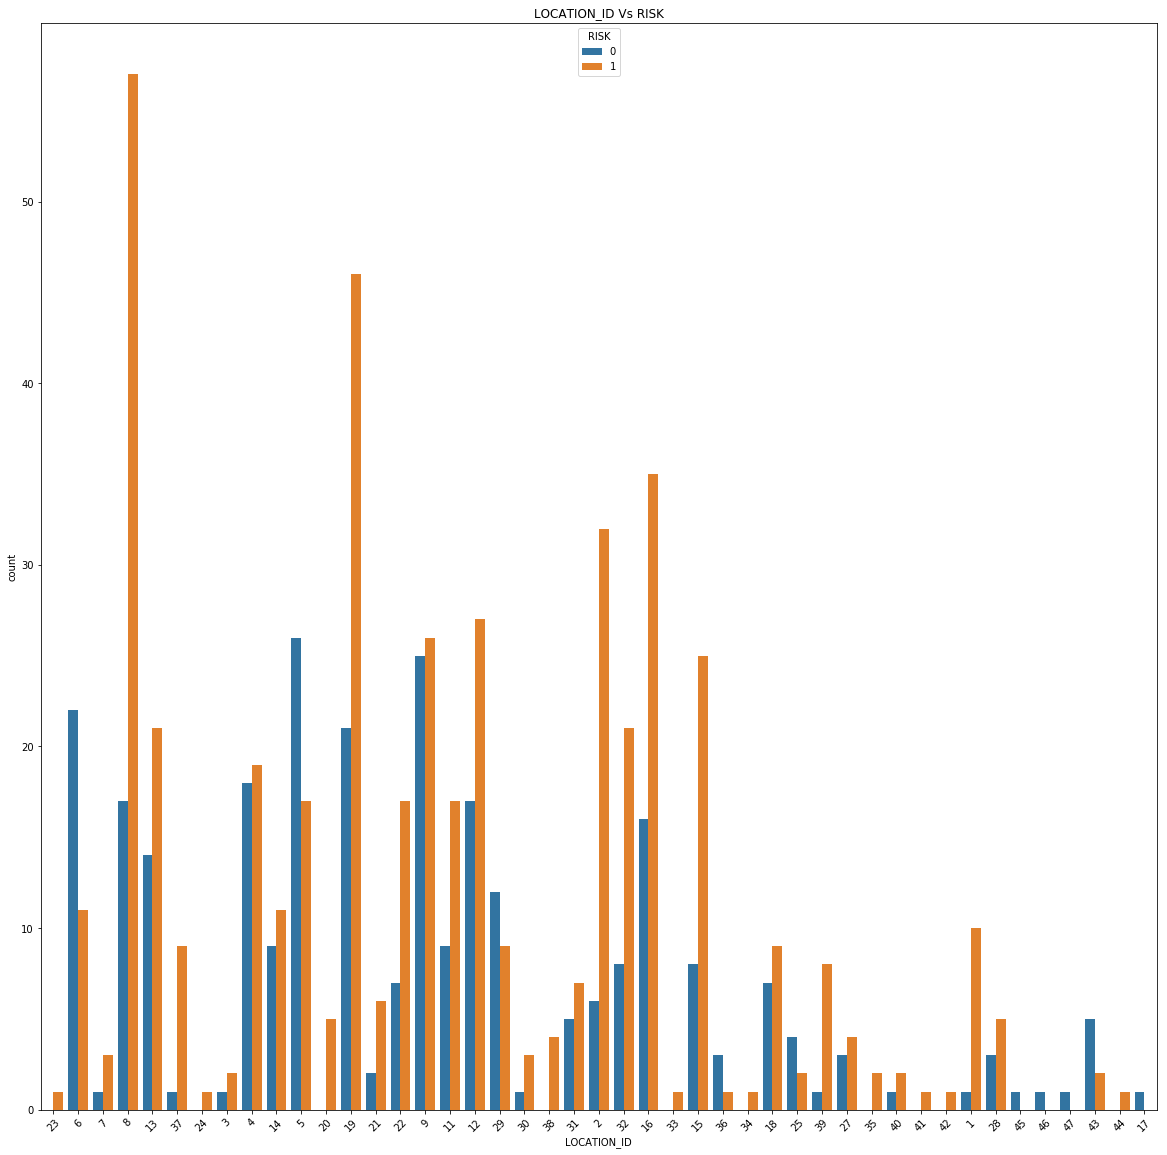

In [40]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='LOCATION_ID',data=final_data[['LOCATION_ID','RISK']],
              hue="RISK").set_title("LOCATION_ID Vs RISK")
plt.xticks(rotation=45)

#### Plot for History vs Risk
It is observed that for the zero history the risk is less i.e., risk is zero,

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

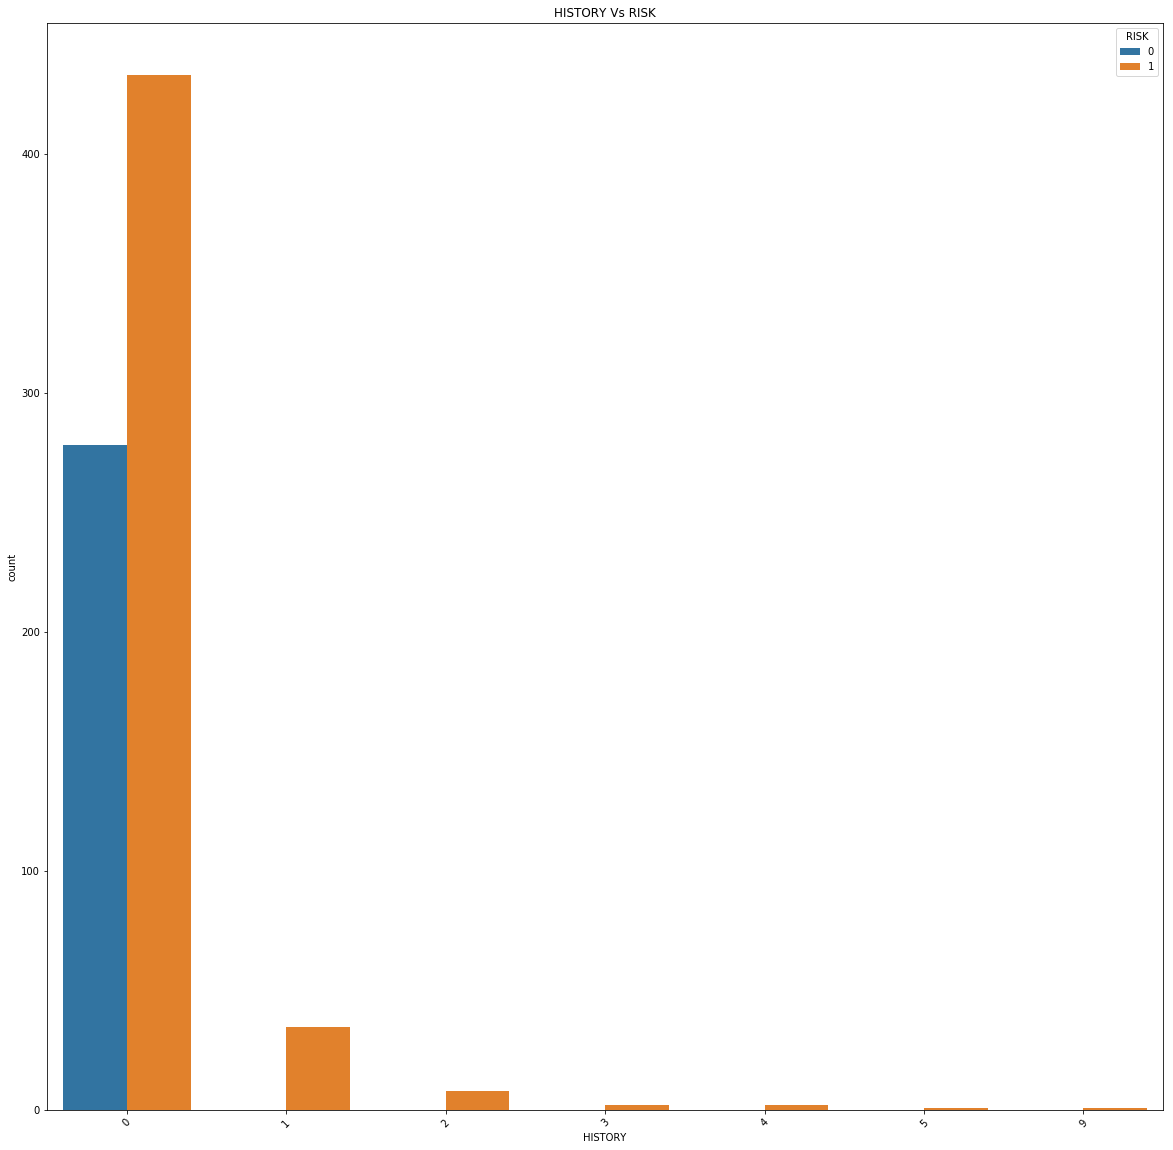

In [41]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='HISTORY',data=final_data[['HISTORY','RISK']],
              hue="RISK").set_title("HISTORY Vs RISK")
plt.xticks(rotation=45)

### Plot for District-LOSS vs Risk
It is observed that the District-loss =2 has less risk as risk=0.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

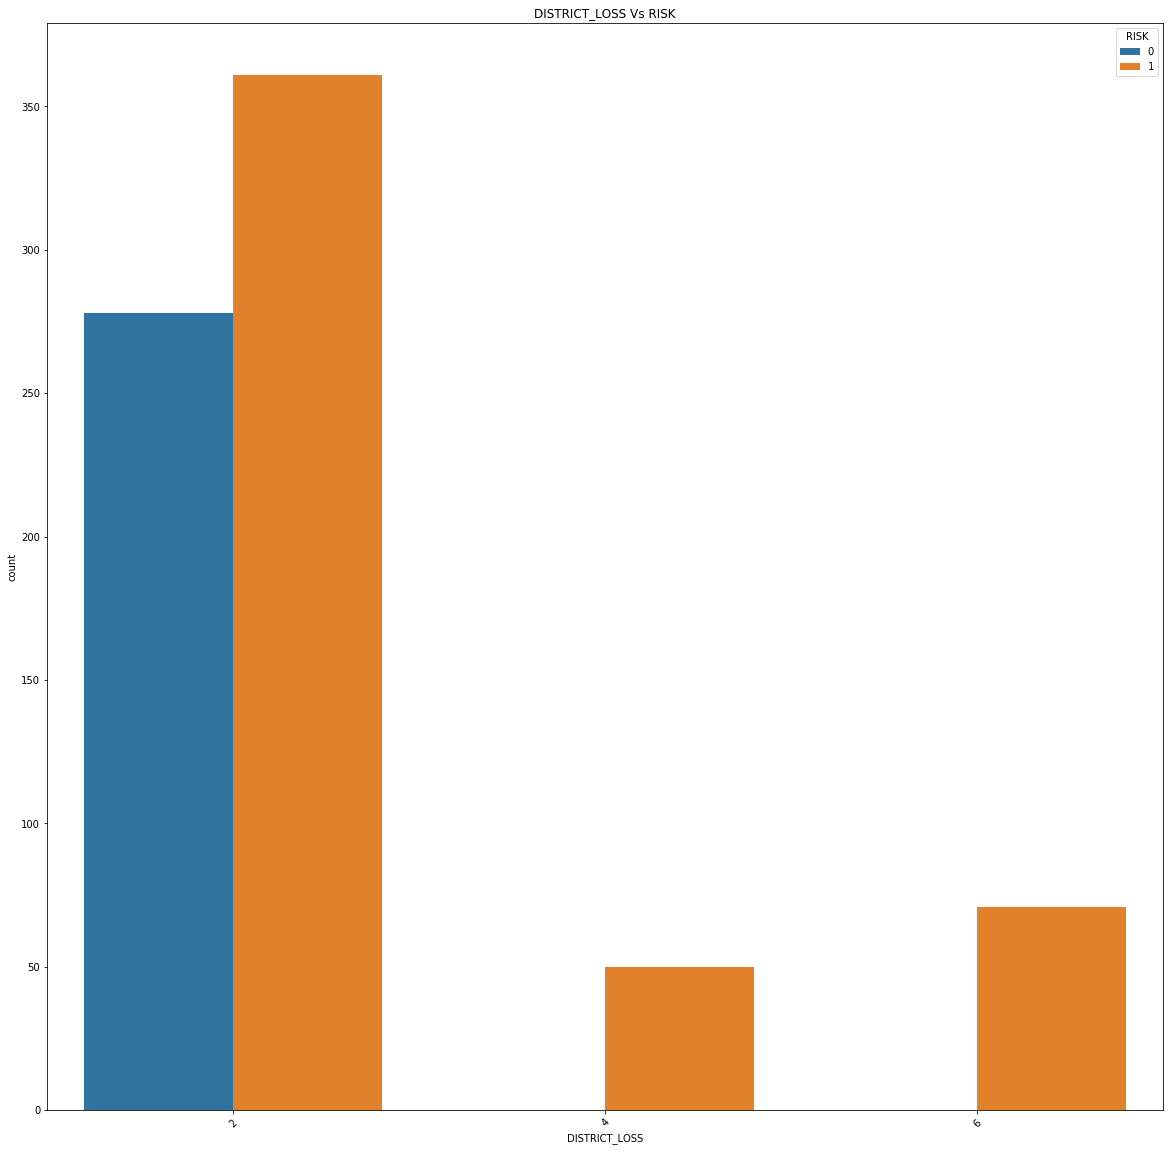

In [42]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='DISTRICT_LOSS',data=final_data[['DISTRICT_LOSS','RISK']],
              hue="RISK").set_title("DISTRICT_LOSS Vs RISK")
plt.xticks(rotation=45)

### Plot for numbers and risk
Here numbers refers to number of transactions. Here the risk is high for numbers of transactions =5. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

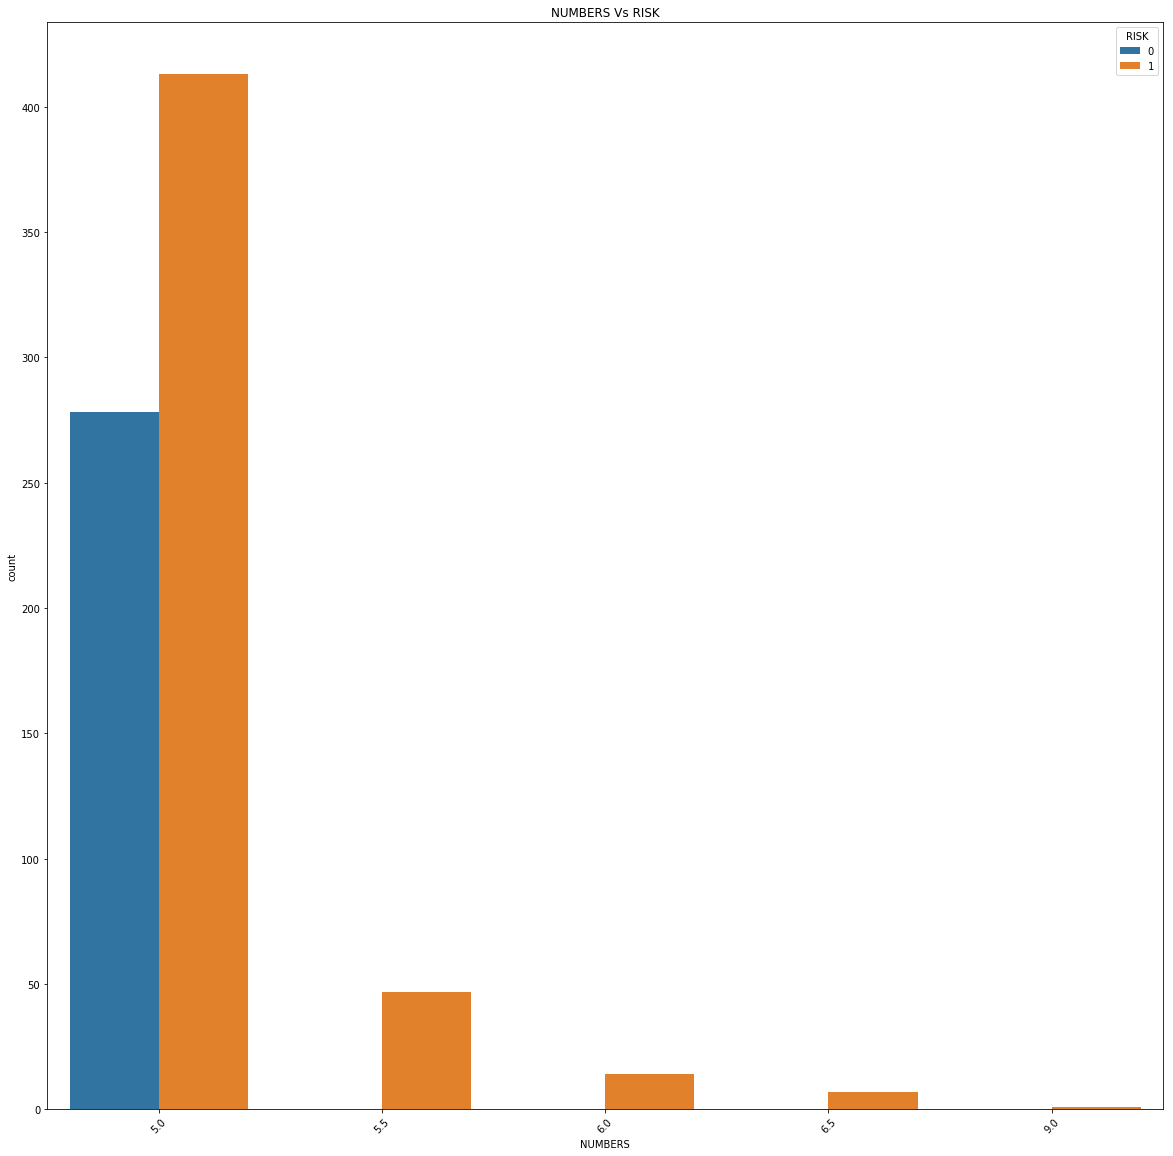

In [43]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='NUMBERS',data=final_data[['NUMBERS','RISK']],
              hue="RISK").set_title("NUMBERS Vs RISK")
plt.xticks(rotation=45)

### Plot for Risk percentage
It is observed that the value_counts for risk=0 and risk=1 are in the same degree. So it can be said that there is no class imbalance problem. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

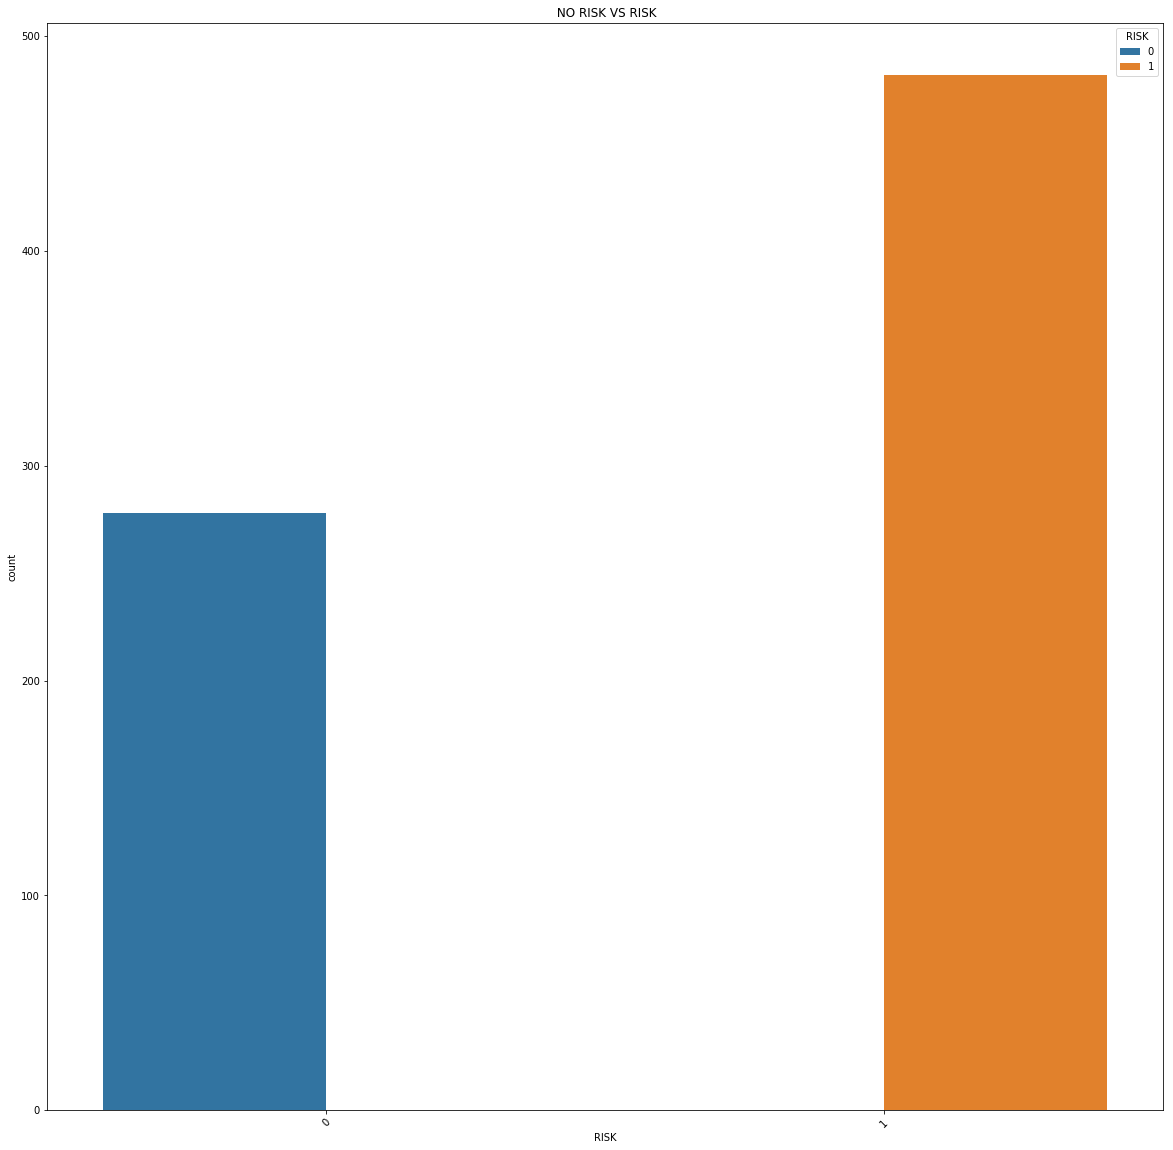

In [44]:
fig = plt.figure(figsize=(20,20))
sns.countplot(x='RISK',data=final_data[['RISK']],
              hue="RISK").set_title(" NO RISK VS RISK")
plt.xticks(rotation=45)

### Scatter plot the correlation between Audit_Risk and Inherent_Risk for risk=1 and risk=0

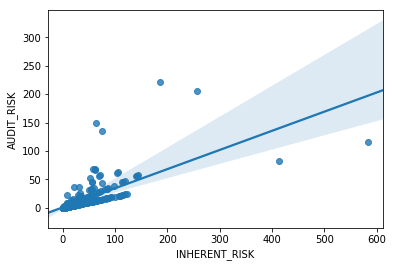

In [45]:
plot1 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_data[final_data["RISK"]==1],scatter=True,x_jitter=True)

Here it is observed from the above plot that there is good linear-correlation between INHERENT_RISK and AUDIT_RISK when RISK=1


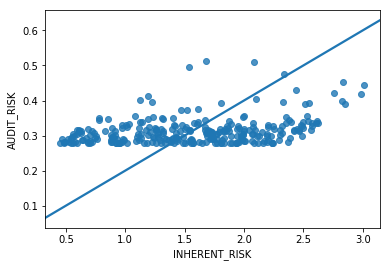

In [46]:
plot2 = sns.regplot("INHERENT_RISK","AUDIT_RISK",data=final_data[final_data["RISK"]==0],scatter=True,x_jitter=True)

Here it is observed that the linear correlation between INHERENT_RISK and AUDIT_RISK when RISK=0 is not so good.

From the above plots it is said that, anything above INHERENT_RISK of 3.5 it is said that the risk is high which is 1.
The distribution is also different for risk=0 and risk=1.


## Scaling the features and splitting the data into X and y.

The data is splitted into to_scale_x_df and y_final_reg which is the target.
The features scaling is performed using MinMaxScaler and StandardScaler as well. 

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

final_data_1 = final_data.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_reg = final_data['AUDIT_RISK']# Regression y

y_clf = final_data['RISK'] # Classification y
x_scaled_df = final_data_1.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = x_scaled_df.copy()
std_x_df = x_scaled_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1', 'RISK_E',
       'HISTORY','RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS','PROB', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=mm_x_df[num_cols]
y=y_reg

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
X.columns
X.shape


(760, 28)

## Correlation Matrix

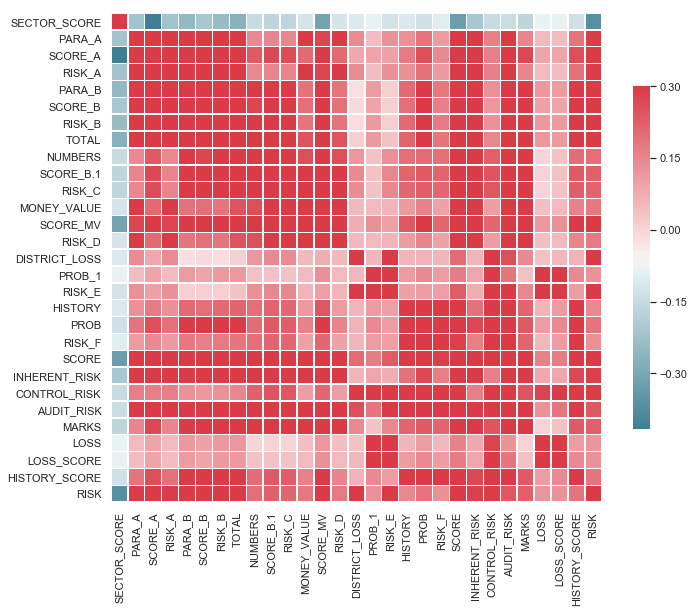

In [49]:
# Correlation matrix - linear relation among independent attributes and with the Target attribute

sns.set(style="white")

# Compute the correlation matrix
correln = final_data.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(correln, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correln,  cmap=cmap, vmax=.3, #mask=mask,
            linewidths=.5, cbar_kws={"shrink": .7})


#### Saving the results in excel

In [50]:
f = open('Group05.csv','w') 
line = 'Model, Train score, Test Score, Best Params,  Test MSE, Test RMSE \n'
f.write(line)
f.close()

## Regression Models

The data preprocessing is done and the application of the models on the data is done below using regression algorithms.

In [51]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 427   size of validation set: 143   size of test set: 190



## LINEAR REGRESSION


The target variable for this model is audit_risk. Since there might be chance of the overfitting problem, the data is divided into train, validation and test to overcome the problem.
The train and test scores i.e., R^2 values obtained after performing linear regression are 0.8030 and 0.6331. It can be observed that the difference between the scores is least.
The root mean square error for this model is 12.508872365490662. 
The mean square error for this model is 156.47188785613596.
The mean average error for this model is 4.055975116968119.


Size of training set: 427   size of validation set: 143   size of test set: 190

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.8030
Test score: 0.6331
Coefficients: 
 [   2.57010502   -1.47819932  -85.58347207    2.77997734   57.84685091
   34.12570454   -0.68365629  -32.17015855  -15.83474767   -3.81782121
  -34.70179901  119.33191822 -280.27517157    1.27889015  150.26232049
   14.46719141    4.22378861  -81.86462387 -351.20353193  215.9463838
   -3.84887546  301.14537963  185.62615274  -34.70179901    4.22378861
   17.91371568    4.22378861   17.91371568]
MAE: 4.055975116968119
MSE: 156.47188785613596
RMSE: 12.508872365490662


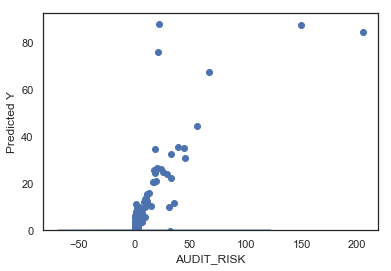

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))



from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_trainval, y_trainval)
print(lreg)
print('Train score: %.4f'%lreg.score(X_trainval, y_trainval))
print('Test score: %.4f'%lreg.score(X_test, y_test))

# The coefficients
print('Coefficients: \n', lreg.coef_)
predictions = lreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.distplot((y_test-predictions), bins=500)
coeffecients = pd.DataFrame(lreg.coef_, X.columns)
coeffecients.columns = ['Coeffecient']


In [53]:
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

# adding vals to excel file that you created.

line = 'LinearRegression' + ',' +str(lreg.score(X_trainval, y_trainval))+','+str(lreg.score(X_test, y_test))+','+str("No parameter")+ ','+str(MSE)+','+str(RMSE) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()


## K-NN Regressor

The below model performed on the data is Knn-Regression. GridSearch CrossValidation is used to find the best hyperparameter value which is n_neighbors and weight here. By using these best hyperparameters the KNN regressor is performed on train and test. The train and test scores i.e., R^2 values obtained 0.6040397141135926 and 0.45656512293674273. It can be seen that the model scores are very low. The root mean square error for this model is 15.223712639624326 which is higher. The mean square error for this model is 231.76142653385745 which is high.


Text(0, 0.5, 'MSE')

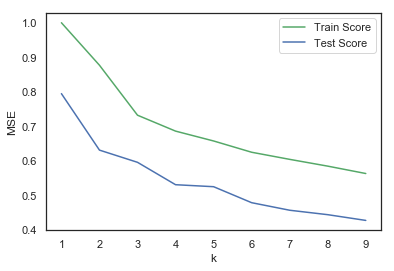

In [54]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trainval, y_trainval)
    train_score_array.append(knn_reg.score(X_trainval, y_trainval))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [55]:
# split data into train+validation set and test set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0


Size of training set: 427   size of validation set: 143   size of test set: 190



In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.55


In [57]:

%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(7)
knn_reg.fit(X_trainval, y_trainval)
train_score_array.append(knn_reg.score(X_trainval, y_trainval))
test_score_array.append(knn_reg.score(X_test, y_test))
print(train_score_array)
print(test_score_array)

[0.6040397141135926]
[0.45656512293674273]


In [58]:
from sklearn import metrics
knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('train mse: ', knn_tr_mse)
print('train rmse: ', knn_tr_rmse)

print('test mse: ', knn_test_mse)
print('test rmse: ', knn_test_rmse)

print('train score: ', knn_reg.score(X_trainval, y_trainval))
print('test score: ', knn_reg.score(X_test, y_test) )



train mse:  96.46824997536108
train rmse:  9.821825185542709
test mse:  231.76142653385745
test rmse:  15.223712639624326
train score:  0.6040397141135926
test score:  0.45656512293674273


In [59]:
# adding vals to excel file that you created.
mse = knn_test_mse
rmse = knn_test_rmse
line = 'K-NN Regressor' + ',' +str(knn_reg.score(X_trainval, y_trainval))+','+str(knn_reg.score(X_test, y_test))+ ','+str('n_neighbors=7')+','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## RIDGE 
Ridge Regression:
L2 regularization is performed which means that it adds penalty equivalent to square of the magnitude of coefficients. The hyperparameter for Ridge is alpha. GridSearch CrossValidation is used to find the best hyperparameter value which is alpha=0.001. By using this best hyperparameters the Ridge is performed on train and test. The train and test scores i.e., R^2 values obtained  0.8026 and 0.6293. It can be seen that the scores difference is not very high. The root mean square error for this model is 12.573627064378822 which is higher. The mean square error for this model is 158.09609755407962.
 

In [60]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    train_score_list.append(ridge.score(X_trainval,y_trainval))
    test_score_list.append(ridge.score(X_test, y_test))

In [61]:
print(train_score_list)
print(test_score_list)

[0.7984427590920387, 0.7873175953334675, 0.7681583365548954, 0.6625976155052724, 0.428394633660913]
[0.6128672374695758, 0.6370079795615959, 0.6938109046903518, 0.5920733825556955, 0.3454696613896825]


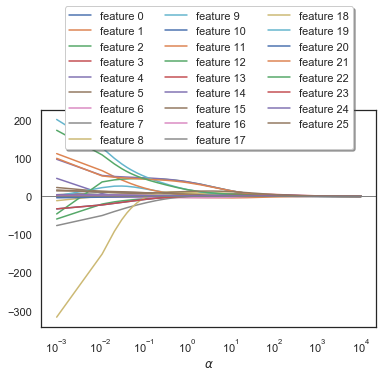

In [62]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval,y_trainval)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,26):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [63]:
from sklearn.linear_model import Ridge
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        ridge =Ridge()
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            

ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


In [64]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(ridge.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8026
Test score: 0.6293


In [65]:
from sklearn import  metrics
ridge_tr_pred = ridge.predict(X_trainval)
ridge_test_pred =ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval,ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('train mse: ', ridge_tr_mse)
print('train rmse: ', ridge_tr_rmse)

print('test mse: ', ridge_test_mse)
print('test rmse: ', ridge_test_rmse)


train mse:  48.084886341422134
train rmse:  6.934326668208106
test mse:  158.09609755407962
test rmse:  12.573627064378822


In [66]:
mse = ridge_test_mse
rmse = ridge_test_rmse
line = 'Ridge' + ',' +str(ridge.score(X_trainval,y_trainval))+','+str(ridge.score(X_test, y_test))+','+str('alpha=0.001')+ ',' +str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a') 
f.write(line)
f.close()

## LASSO

L2 regularization is performed. The hyperparameter for Ridge is alpha. GridSearch CrossValidation is used to find the best hyperparameter value which is alpha=0.001. By using this best hyperparameters the Lasso is performed on train and test. The train and test scores i.e., R^2 values obtained 0.8015 and 0.62923. It can be seen that the scores difference is not very high. The root mean square error for this model is 5.147270413067832 which is low. The mean square error for this model is 26.494392705243488. It can be observed that the root mean square error and mean square error are very less when compare with ridge, linear and knn regressor

In [67]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    train_score_list.append(lasso.score(X_trainval,y_trainval))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

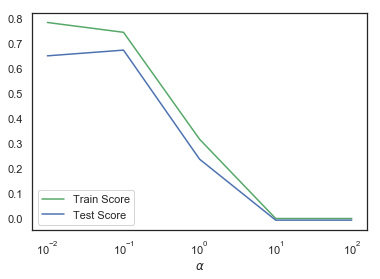

In [68]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packa

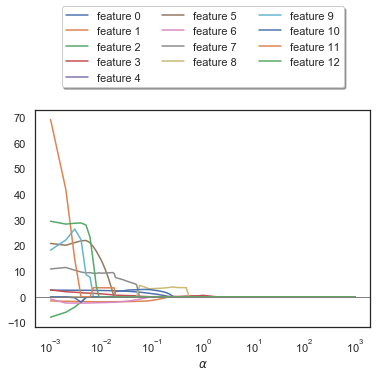

In [69]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval,y_trainval)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [70]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        lasso =Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.75
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.63


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [71]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_trainval,y_trainval)
print('Train score: {:.4f}'.format(lasso.score(X_trainval,y_trainval)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score: 0.8015
Test score: 0.6292


In [72]:
from sklearn.linear_model import Lasso

train_score_list = []
test_score_list = []


lasso = Lasso(alpha=0.001)
lasso.fit(X,y)

test_score_list.append(lasso.score(X, y))

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:

print(test_score_list)

[0.8434658872961092]


In [74]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_trainval)
lasso_test_pred =lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval,lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('train mse: ', lasso_tr_mse)
print('train rmse: ', lasso_tr_rmse)

print('test mse: ', lasso_test_mse)
print('test rmse: ', lasso_test_rmse)

train mse:  51.66600414930979
train rmse:  7.187906798874746
test mse:  26.494392705243488
test rmse:  5.147270413067832


In [75]:
# adding vals to excel file that you created.
mse = lasso_test_mse
rmse = lasso_test_rmse
line = 'Lasso' + ',' +str(lasso.score(X_trainval,y_trainval))+','+str(lasso.score(X_test, y_test))+','+str('alpha=0.001')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a') 
f.write(line)
f.close()

## POLYMONIAL REGRESSION



In [76]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_trainval)
    train_score_list.append(lreg.score(X_train_poly, y_trainval))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [77]:
from sklearn import  metrics
poly_train_pred = lreg.predict(X_train_poly)
poly_test_pred =lreg.predict(X_test_poly)
poly_mse = metrics.mean_squared_error(y_trainval,poly_train_pred)
poly_rmse = np.sqrt(poly_mse)
poly_test_mse = metrics.mean_squared_error(y_test, poly_test_pred)
poly_test_rmse = np.sqrt(poly_test_mse)

print('train mse: ', poly_mse)
print('train rmse: ', poly_rmse)

print('test mse: ', poly_test_mse)
print('test rmse: ', poly_test_rmse)



print(train_score_list)
print(test_score_list)


train mse:  8.801358313650527e-27
train rmse:  9.381555475319925e-14
test mse:  1.3362381145310251
test rmse:  1.155957661219054
[0.8030326957855612, 1.0]
[0.6331042554722419, 0.9968667849246634]


In [78]:
# adding vals to excel file that you created.
mse = poly_test_mse
rmse = poly_test_rmse
line = 'Polynomial ' + ',' +str(lreg.score(X_train_poly, y_trainval))+','+str(lreg.score(X_test_poly, y_test))+','+str('degree=1')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a') 
f.write(line)
f.close()

## DECISION TREE

This model depicts the decision tree regression using which the train and test scores, root mean square error and mean square error are obtained.

In [79]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import mglearn


dt_r = DecisionTreeRegressor()
dt_r.fit(X_trainval,y_trainval)

dt_tr_pred = dt_r.predict(X_trainval)
dt_test_pred = dt_r.predict(X_test)
lreg = LinearRegression().fit(X_trainval, y_trainval)

pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)


print('Train Score:',dt_r.score(X_trainval,y_trainval))      
print('Train Score:',dt_r.score(X_test, y_test))


Train Score: 0.9999999999552395
Train Score: 0.7334149417304358


In [80]:

pred_lr 
pred_test


array([ 1.25576222e-01,  1.56941258e+00,  4.56357760e+00, -1.78529416e+00,
        3.48082031e+01,  1.66855292e+00, -1.06626302e+00,  3.42759476e+00,
        2.42584867e+01, -9.36380540e-01,  4.54751612e+00,  1.33702238e+01,
       -1.64930054e-01, -1.11685836e+00,  1.48224460e+00, -7.39329875e-01,
       -8.78003816e-01, -1.07029023e+00,  1.05956958e-01, -1.48188507e+00,
        7.42646521e-01, -4.93897181e-01,  8.46659545e+01, -1.06157976e+00,
       -2.69600076e+00,  8.44368137e-01, -3.48126396e-01,  7.39934520e+00,
       -1.46369608e-01,  7.99373443e+00,  8.80421661e+01,  1.12141233e+01,
        9.92928487e+00,  1.18423687e+00, -1.20249379e+00,  2.07481418e+01,
        1.25905965e+00,  6.29189512e+00, -1.80157970e+00,  4.49919172e-02,
        8.79344228e+00,  2.80124666e-01,  2.97341324e+00,  5.04745849e-01,
        2.53918505e+00,  5.50008428e-01, -7.69412431e-01, -3.10772009e+00,
        1.26590864e+01,  7.40373730e+00, -5.68827361e-01,  4.49335405e-01,
        6.00120787e+00,  

In [81]:
from sklearn import  metrics
pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)
pred_lr_mse = metrics.mean_squared_error(y_trainval,pred_lr)
pred_lr_rmse = np.sqrt(pred_lr_mse)
pred_test_mse = metrics.mean_squared_error(y_test, pred_test)
pred_test_rmse = np.sqrt(pred_test_mse)

print('train mse: ', pred_lr_mse)
print('train rmse: ', pred_lr_rmse)

print('test mse: ', pred_test_mse)
print('test rmse: ', pred_test_rmse)

train mse:  47.9873659485701
train rmse:  6.927291386145821
test mse:  156.47188785613596
test rmse:  12.508872365490662


In [82]:
# adding vals to excel file that you created.
mse = pred_test_mse
rmse = pred_test_rmse
line = 'Decision Tree ' + ',' +str(dt_r.score(X_trainval,y_trainval))+','+str(dt_r.score(X_test, y_test))+','+str('-')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## SVM 
Performed the linear, rbf and poly. The GridSearchCV is used to find the best hyper parameters like C for linear svm, C and gamma for kernalised rbf and C and degree for kernel=poly.

In [83]:
from sklearn.model_selection import GridSearchCV


from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=5, return_train_score=True,)
    

grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

Best parameters: {'C': 100}
Best cross-validation score: 0.79


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [84]:
# SVM Linear


from sklearn import svm
svm_r = svm.SVR(kernel='linear', C = 100)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

print("train score:", svm_r.score(X_trainval,y_trainval))
print("test score:", svm_r.score(X_test,y_test))
    
svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_tr_mse)
print('train rmse: ', svm_tr_rmse)

print('test mse: ', svm_test_mse)
print('test rmse: ', svm_test_rmse)

train score: 0.6907917684951009
test score: 0.5668714753016784
train mse:  75.33274935509861
train rmse:  8.679444069472343
test mse:  184.71851733009643
test rmse:  13.591119060993337


In [85]:
# adding vals to excel file that you created.
mse = svm_test_mse
rmse = svm_test_rmse
line = 'Svm Linear ' + ',' +str(svm_r.score(X_trainval,y_trainval))+','+str(svm_r.score(X_test,y_test))+','+str('C=100')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

In [86]:
#### Grid search for kernel = rbf

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.85


In [87]:
# SVM RBF

svm_r = svm.SVR(kernel='rbf', C = 1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_rbf_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_rbf_tr_rmse = np.sqrt(svm_tr_mse)
svm_rbf_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_rbf_test_rmse = np.sqrt(svm_test_mse)

print("train score:", svm_r.score(X_trainval,y_trainval))
print("test score:",svm_r.score(X_test,y_test))

print('train mse: ', svm_rbf_tr_mse)
print('train rmse: ', svm_rbf_tr_rmse) 

print('test mse: ', svm_rbf_test_mse)
print('test rmse: ', svm_rbf_test_rmse)

train score: 0.18862900843821262
test score: 0.11016566730014497
train mse:  197.67522760904745
train rmse:  8.679444069472343
test mse:  379.4921581768773
test rmse:  13.591119060993337


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
# adding vals to excel file that you created.
mse = svm_rbf_test_mse
rmse = svm_rbf_test_rmse
line = 'Svm Kernel=RBF ' + ',' +str(svm_r.score(X_trainval,y_trainval))+','+str(svm_r.score(X_test,y_test))+','+str('C=1 and gamma=0.1')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a') 
f.write(line)
f.close()

In [89]:
### Grid search for kernel=poly
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree': [1,2,3]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.79


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [90]:
## SVM Regressor - poly Kernel

svm_poly = svm.SVR(kernel='poly', C = 100, degree=1)
svm_poly.fit(X_trainval, y_trainval)

svmr_poly_tr_pred = svm_poly.predict(X_trainval)
svmr_poly_test_pred = svm_poly.predict(X_test)

svm_poly_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_poly_tr_rmse = np.sqrt(svm_tr_mse)
svm_poly_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_poly_test_rmse = np.sqrt(svm_test_mse)

print('train mse: ', svm_poly_tr_mse)
print('train rmse: ', svm_poly_tr_rmse)

print('test mse: ', svm_poly_test_mse)
print('test rmse: ', svm_poly_test_rmse)

print("train score:", svm_poly.score(X_trainval,y_trainval))
print("test score:",svm_poly.score(X_test,y_test))

train mse:  197.67522760904745
train rmse:  8.679444069472343
test mse:  379.4921581768773
test rmse:  13.591119060993337
train score: 0.579835507285468
test score: 0.451426525033158


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
# adding vals to excel file that you created.
mse = svm_poly_test_mse
rmse = svm_poly_test_rmse
line = 'Svm Kernel=Poly ' + ',' +str(svm_poly.score(X_trainval,y_trainval))+','+str(svm_poly.score(X_test,y_test))+','+str('C = 10 and degree=1')+ ','+str(mse)+','+str(rmse) +'\n'
f = open('Group05.csv','a') 
f.write(line)
f.close()

## RANDOM FOREST

In the below the Random Forest regression model is applied on the data. The GRidSearchCV is used to find the best hyperparameter values which are estimator and max_features. Random forest was used to determine the feature importance.

In [92]:
from sklearn.ensemble import RandomForestRegressor

estimator = [20,50,70]
max_features_val= [10,15,20]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)

{'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]}


In [93]:
rf_r = RandomForestRegressor()

rfgs = GridSearchCV(rf_r, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [94]:
rfgs.best_score_

0.8795242993707214

In [95]:
rfgs.best_params_

{'max_features': 20, 'n_estimators': 50}

In [96]:
rf_r_best = RandomForestRegressor(n_estimators= 20,max_features= 20 )

In [97]:
rf_r_best.fit(X_trainval,y_trainval)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [98]:
feature_imp = rf_r_best.feature_importances_

In [99]:
cols = X_trainval.columns

In [100]:
feat_cols = pd.DataFrame({'name_col': cols, 'feature_importance':feature_imp})
feat_cols

,name_col,feature_importance
0,SECTOR_SCORE,0.018212
1,LOCATION_ID,0.017664
2,PARA_A,0.031711
3,SCORE_A,0.000117
4,RISK_A,0.011028
5,PARA_B,0.007659
6,SCORE_B,0.001292
7,RISK_B,0.005330
8,TOTAL,0.001749
9,NUMBERS,0.006164


In [101]:
feat_cols.sort_values(by='feature_importance',ascending=False)

,name_col,feature_importance
21,INHERENT_RISK,0.459119
14,RISK_D,0.133916
22,CONTROL_RISK,0.117794
12,MONEY_VALUE,0.071211
20,SCORE,0.040530
2,PARA_A,0.031711
18,HISTORY,0.024842
19,RISK_F,0.019345
0,SECTOR_SCORE,0.018212
1,LOCATION_ID,0.017664


Text(0.5, 0, 'Relative Importance')

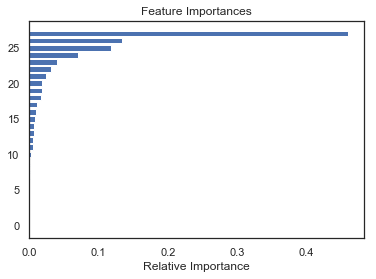

In [102]:
features=feat_cols
importances = rf_r_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(feat_cols[name_cols])
plt.xlabel('Relative Importance')

## Conclusion 
After performing all the models it is observed that polynomial is giving the best results as the mean square error is less and the scores are optimal.
It shows the best results against the other models

## CLASSIFICATION

Here the inner merge is performed.

In [103]:
L= ['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'NUMBERS', 'MONEY_VALUE', 'HISTORY','SCORE', 'RISK']

In [104]:
audit_risk = audit_df.merge(trial_df, on=L)

### Data Preprocessing

In [105]:
audit_risk['RISK'].unique()

array([1, 0], dtype=int64)

In [106]:
audit_risk = audit_risk.drop(["MONEY_MARKS","DISTRICT"], axis=1)

In [107]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 30 columns):
SECTOR_SCORE     629 non-null float64
LOCATION_ID      629 non-null object
PARA_A           629 non-null float64
SCORE_A          629 non-null float64
RISK_A           629 non-null float64
PARA_B           629 non-null float64
SCORE_B          629 non-null float64
RISK_B           629 non-null float64
TOTAL            629 non-null float64
NUMBERS          629 non-null float64
SCORE_B.1        629 non-null float64
RISK_C           629 non-null float64
MONEY_VALUE      628 non-null float64
SCORE_MV         629 non-null float64
RISK_D           629 non-null float64
DISTRICT_LOSS    629 non-null int64
PROB_1           629 non-null float64
RISK_E           629 non-null float64
HISTORY          629 non-null int64
PROB             629 non-null float64
RISK_F           629 non-null float64
SCORE            629 non-null float64
INHERENT_RISK    629 non-null float64
CONTROL_RISK     629 non-n

In [108]:
audit_risk['MONEY_VALUE'] = audit_risk["MONEY_VALUE"].fillna(audit_risk["MONEY_VALUE"].mean())

audit_risk.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB_1           0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK             0
MARKS            0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
dtype: int64

In [109]:
audit_risk.isna().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB_1           False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

The string values for LOCATION_ID is replaced by unique numbers

In [110]:
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("LOHARU", 45)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("NUH", 46)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("SAFIDON", 47)

#### Removing the outliers

In [111]:
sans_out = audit_risk[audit_risk.PARA_B != 1264.630000]
audit_risk.shape

(629, 30)

In [112]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,628.000000,628.000000
mean,17.235104,10.114415
std,73.623456,44.213178
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.140000,0.027000
75%,9.107500,3.585000
max,935.030000,561.018000


In [113]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE
34,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.0,4.0,577.508,0.4,115.5016,1,2,0,2,2
288,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.0,4.0,622.838,0.4,124.5676,1,2,0,2,2


In [114]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [115]:
final_df.shape
final_df.isnull().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB_1           False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

In [116]:
final_df['RISK'].unique()
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1',
       'RISK_E', 'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK',
       'CONTROL_RISK', 'AUDIT_RISK', 'RISK', 'MARKS', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE'],
      dtype='object')

### Scaling the data

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Audit_risk = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = Audit_risk.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=std_x_df[num_cols]
y=y_final_clf

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
X.shape

(626, 28)

In [119]:
f = open('Group05.csv','a') 
line = ' classification model \n Model, Best Params, Accuracy Score, f1 score, Recall,Precision \n'
f.write(line)
f.close()

## K-NN CLASSIFICATION

Here the knn classification is performed on the the preprocessed data. The knn classification has hyper parameters as n_neighbors and weights. Gridsearch cv is used to obtain the best parameters, The data is split into train, validation and testto overcome overfitting problem.


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 351   size of validation set: 118   size of test set: 157



## KNN classification

In [121]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_trainval, y_trainval)
    train_score_array.append(knn.score(X_trainval, y_trainval))
    test_score_array.append(knn.score(X_test, y_test))

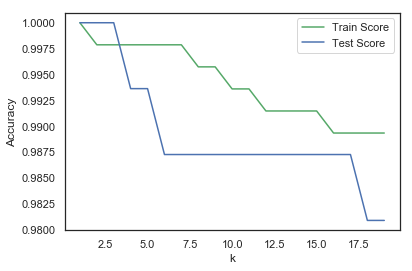

In [122]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()


The best parameter for the KNN classifaction is n_neighbors=1 and which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [123]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()



k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)



grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 1.00


In [124]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [126]:
knn_c_bst_clf = KNeighborsClassifier(n_neighbors=1)

knn_c_bst_clf.fit(X_trainval,y_trainval)

knnc_tr_pred = knn_c_bst_clf.predict(X_trainval)
knnc_test_pred = knn_c_bst_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

1
Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics
In the below evaluation metrics we can see that there is no missclassification. Hence the precision and recall are 1.

In [127]:
pd.crosstab(y_trainval, knnc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [128]:
pd.crosstab(y_test, knnc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [129]:
from sklearn.metrics import classification_report
report = classification_report(y_test, knnc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



#### Calculating the roc and plotting roc curve.

AUC: 1.000
[2. 1. 0.]


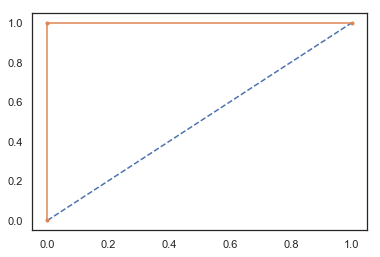

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
knn_c_bst_clf.fit(X_trainval,y_trainval)
# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Here we can say that the model is the perfect skill. 

#### Precision-Recall curve

f1=1.000 auc=1.000 ap=1.000


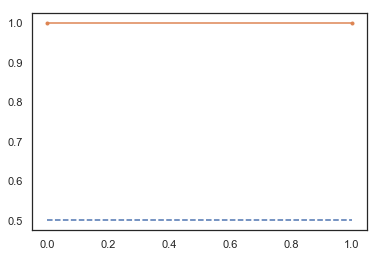

In [131]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = knn_c_bst_clf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_c_bst_clf.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, knnc_test_pred)
f1score = f1_score(y_test, knnc_test_pred)
recallscore= recall_score(y_test, knnc_test_pred)
precision =  precision_score(y_test, knnc_test_pred)
# adding vals to excel file that you created.

line = 'Knn Classification' + ',' +str("n_neighbors=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## LOGISTIC REGRESSION

The below model depicts the logistic regression. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and penalty. The best parameter for the logistic regression is C=1 and penalty = l1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [133]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_trainval, y_trainval)
    log_l2.fit(X_trainval, y_trainval)
    train_score_l1.append(log_l1.score(X_trainval, y_trainval))
    train_score_l2.append(log_l2.score(X_trainval, y_trainval))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\pytho

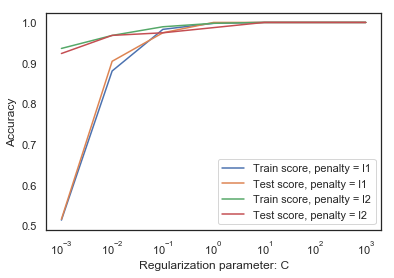

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [135]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_mod = ['l1','l2']

log_reg = LogisticRegression()

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod,C=c_range)
print(param_grid)

#instantiation of the grid
log_reg_grid = GridSearchCV(log_reg,param_grid, cv=10, scoring='accuracy')

# fitting the grid
log_reg_grid.fit(X, y)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\pytho

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\pytho

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\pytho

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
log_reg_grid.best_score_

0.9904153354632588

In [137]:
log_reg_grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [138]:
scores = cross_val_score(log_reg, X, y,cv=10) # input arguments followed by X and Y
print("Cross-validation scores: {}".format(scores))



Cross-validation scores: [1.         0.96875    1.         1.         1.         1.
 0.98387097 1.         1.         0.90322581]


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\supriya\appdata\local\programs\python\pytho

In [139]:
log_reg = LogisticRegression(penalty = 'l1', C = 100)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

1.0
1.0


c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Evaluation metrics

It can be seen that there is no missclassification. Hence precision and recall are 1

In [140]:
pd.crosstab(y_trainval, logreg_tr_pred)


col_0,0,1
RISK,,
0,241,0
1,0,228


In [141]:
print(log_reg.score(X_trainval, y_trainval))

1.0


In [142]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [143]:
print(log_reg.score(X_test, y_test))

1.0


In [144]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

print("Accuracy score: ", accuracy_score(y_trainval, logreg_tr_pred))
print("f1 score: ", f1_score(y_trainval, logreg_tr_pred))
print("recall score: ", recall_score(y_trainval, logreg_tr_pred))
print("precision: ", precision_score(y_trainval, logreg_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, logreg_test_pred))
print("f1 score: ", f1_score(y_test, logreg_test_pred))
print("recall score: ", recall_score(y_test, logreg_test_pred))
print("precision: ", precision_score(y_test, logreg_test_pred))

Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Calculating and plotting Roc curve

AUC: 1.000
[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.98498133e-01 5.19010877e-05
 5.09721397e-05 4.35308139e-05 4.31549430e-05 2.45695901e-05
 2.31149430e-05 1.60053279e-05]


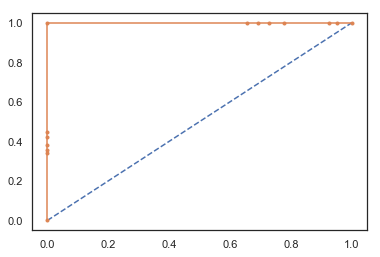

In [146]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

#### Precision and Recall curve 

f1=1.000 auc=1.000 ap=1.000


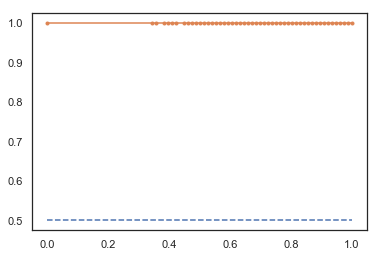

In [147]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = log_reg.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, logreg_test_pred)
f1score = f1_score(y_test, logreg_test_pred)
recallscore= recall_score(y_test, logreg_test_pred)
precision =  precision_score(y_test, logreg_test_pred)
# adding vals to excel file that you created.

line = 'Logistic Regression' + ',' +str("penalty=l2 and c=10")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## LINEAR SVM

The below model depicts the Linear SVM. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C. The best parameter for the Linear SVM is C=10 and which leaves the model with an accuracy =0.9936305732484076
and precision of 1 stating that the model has very less misclassifications.

In [149]:
from sklearn.svm import LinearSVC

In [150]:
c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [151]:
clf = LinearSVC()
linearsvc_grid_search = GridSearchCV(estimator=clf, param_grid = dict(C=c_range)   ,n_jobs=-1)
linearsvc_grid_search.fit(X, y)

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
linearsvc_grid_search.best_score_

0.9888178913738019

In [153]:
linearsvc_grid_search.best_params_

{'C': 0.1}

In [154]:
clf_best = LinearSVC(C=10)

In [155]:
linearsvc_grid_search.best_params_

{'C': 0.1}

In [156]:
clf_best = LinearSVC(C=10)

In [157]:
clf_best.fit(X_trainval, y_trainval)

clf_tr_pred = clf_best.predict(X_trainval)
clf_test_pred = clf_best.predict(X_test)

In [158]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [159]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [160]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [161]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, clf_test_pred)
f1score = f1_score(y_test, clf_test_pred)
recallscore= recall_score(y_test, clf_test_pred)
precision =  precision_score(y_test, clf_test_pred)
# adding vals to excel file that you created.

line = 'Linear SVC' + ',' +str("C=0.1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## SVC LINEAR KERNEL

The below model depicts the SVC Linear with Kernel. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C . The best parameter for the SVC Linear with Kernel is C=1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.


In [163]:
from sklearn.svm import SVC, LinearSVC

c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [164]:
svc = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range) ,n_jobs=-1)
grid_search.fit(X, y)

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
grid_search.best_score_

1.0

In [166]:
grid_search.best_params_

{'C': 1}

In [167]:
svc_best = SVC(C=1.0, gamma='auto',probability=True)

In [168]:
svc_best.fit(X_trainval, y_trainval)

svc_tr_pred = svc_best.predict(X_trainval)
svc_test_pred = svc_best.predict(X_test)

In [169]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


### Evaluation metrics

In [170]:
pd.crosstab(y_trainval, svc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [171]:
pd.crosstab(y_test, svc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [172]:
report = classification_report(y_test, svc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



AUC: 1.000
[2.         1.         0.90705223 0.00735334 0.00724142 0.00695649
 0.00687339 0.00670755 0.00664635 0.00511329]


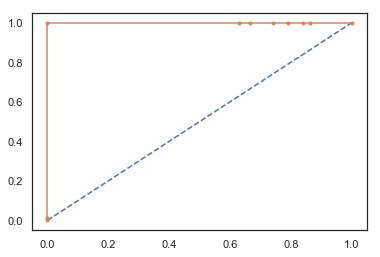

In [173]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = svc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [174]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_test_pred)
f1score = f1_score(y_test, svc_test_pred)
recallscore= recall_score(y_test, svc_test_pred)
precision =  precision_score(y_test, svc_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as Linear' + ',' +str("C=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## SVC Kernel RBF

The below model depicts the SVC with kernel=rbf. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and gamma. The best parameter for the SVC with kernel=rbf is C=10 and gamma=0.5 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications.

In [175]:
#from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range=[0.001, 0.05,0.07,0.03,0.01,0.5,0.3, 0.1, 1, 10, 100]

param_grid = dict(C=c_range, gamma=gamma_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]}


In [176]:
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,gamma=gamma_range) ,n_jobs=-1)
grid_search.fit(X, y)

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [177]:
grid_search.best_score_

1.0

In [178]:
grid_search.best_params_

{'C': 10, 'gamma': 0.5}

In [179]:
svc_best_rbf = SVC(kernel='rbf',C=1.0, gamma=0.5)

In [180]:
svc_best_rbf.fit(X_trainval, y_trainval)

svc_rbf_tr_pred = svc_best_rbf.predict(X_trainval)
svc_rbf_test_pred = svc_best_rbf.predict(X_test)

In [181]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_rbf_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_rbf_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_rbf_tr_pred))
print("precision: ", precision_score(y_trainval, svc_rbf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_rbf_test_pred))
print("f1 score: ", f1_score(y_test, svc_rbf_test_pred))
print("recall score: ", recall_score(y_test, svc_rbf_test_pred))
print("precision: ", precision_score(y_test, svc_rbf_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [182]:
pd.crosstab(y_trainval, svc_rbf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [183]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [184]:
#Report


report = classification_report(y_test, svc_rbf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [185]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_rbf_test_pred)
f1score = f1_score(y_test, svc_rbf_test_pred)
recallscore= recall_score(y_test, svc_rbf_test_pred)
precision =  precision_score(y_test, svc_rbf_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as rbf' + ',' +str("C=10 and gamma=0.5")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## SVC kernel poly

The below model depicts the SVC with kernel=poly. The procedures GridSearchCV is used in the model to derive the best parameters i.e., C and degree. The best parameter for the SVC with kernel=poly is C=10 and degree=1 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications

In [186]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
degree_range=[1,2,3,4]

param_grid = dict(C=c_range, degree = degree_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}


In [187]:
svc = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,degree = degree_range) ,n_jobs=-1)
grid_search.fit(X, y)

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [188]:
grid_search.best_score_

1.0

In [189]:
grid_search.best_params_

{'C': 10, 'degree': 1}

In [190]:
svc_best_poly = SVC(kernel='poly',C=1.0, degree=1)

In [191]:
svc_best_poly.fit(X_trainval, y_trainval)

svc_poly_tr_pred = svc_best_poly.predict(X_trainval)
svc_poly_test_pred = svc_best_poly.predict(X_test)

c:\users\supriya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [192]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_poly_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_poly_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_poly_tr_pred))
print("precision: ", precision_score(y_trainval, svc_poly_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_poly_test_pred))
print("f1 score: ", f1_score(y_test, svc_poly_test_pred))
print("recall score: ", recall_score(y_test, svc_poly_test_pred))
print("precision: ", precision_score(y_test, svc_poly_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [193]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [194]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [195]:
#Report


report = classification_report(y_test, svc_poly_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, svc_poly_test_pred)
f1score = f1_score(y_test, svc_poly_test_pred)
recallscore= recall_score(y_test, svc_poly_test_pred)
precision =  precision_score(y_test, svc_poly_test_pred)
# adding vals to excel file that you created.

line = 'SVC Kernel as poly' + ',' +str("C=10 and degree=1")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## Decision Tree

The below model depicts the Decision Tree. The procedures GridSearchCV is used in the model to derive the best parameters i.e., max_depth. The best parameter for the Decision Tree is max_depth=4 , which leaves the model with an accuracy and precision of 1 stating that the model is a perfect fit without any misclassifications

In [197]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(DT, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [198]:
gs_dt.best_score_

1.0

In [199]:
gs_dt.best_params_

{'max_depth': 4}

In [200]:
dt_best = DecisionTreeClassifier(max_depth=4)
dt_best.fit(X_trainval, y_trainval)

dt_tr_pred = dt_best.predict(X_trainval)
dt_test_pred = dt_best.predict(X_test)

In [201]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_tr_pred))
print("f1 score: ", f1_score(y_trainval, dt_tr_pred))
print("recall score: ", recall_score(y_trainval, dt_tr_pred))
print("precision: ", precision_score(y_trainval, dt_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


#### Evaluation metrics

In [202]:
pd.crosstab(y_trainval, dt_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [203]:
pd.crosstab(y_test, dt_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [204]:
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



#### ROC curve 

AUC: 1.000
[2. 1. 0.]


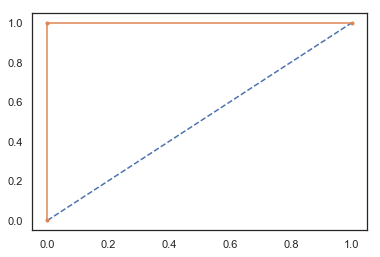

In [205]:
### ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
probs = dt_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print( thresholds )
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [206]:
#### Precision and recall curve
X_train.columns


Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB_1',
       'RISK_E', 'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK',
       'CONTROL_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE'],
      dtype='object')

f1=1.000 auc=1.000 ap=1.000


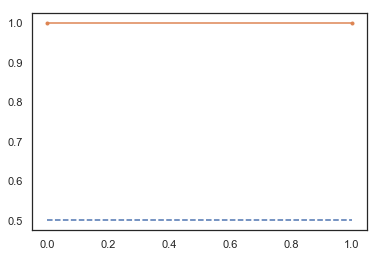

In [207]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# predict probabilities
probs = dt_best.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
y_prd_class_val = dt_best.predict(X_test)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
f1 = f1_score(y_test, y_prd_class_val)

# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

#### Plotting the important features



In [208]:
fea_imp = dt_best.feature_importances_
columns = X_trainval.columns
feat_cols = pd.DataFrame({'name_col':columns,'feat_imp':fea_imp})

Text(0.5, 0, 'Relative Importance')

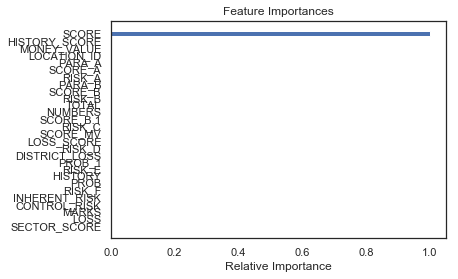

In [209]:
features=columns
importances = dt_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
Accuracy=accuracy_score(y_test, dt_test_pred)
f1score = f1_score(y_test, dt_test_pred)
recallscore= recall_score(y_test, dt_test_pred)
precision =  precision_score(y_test, dt_test_pred)
# adding vals to excel file that you created.

line = 'Decision Tree' + ',' +str("max_depth=4")+','+str(Accuracy )+','+str(f1score)+ ','+str(recallscore)+','+str(precision) +'\n'
f = open('Group05.csv','a')
f.write(line)
f.close()

## RANDOM FOREST

The Random forest model is used on the data which is used for analysing the feature importance

In [211]:
from sklearn.ensemble import RandomForestClassifier

estimator = [20,50,70]
max_features_val= [10,15,20]


param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)


{'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]}


In [212]:
rf_c = RandomForestClassifier()

rfgs_c = GridSearchCV(rf_r, param_grid = param_grid, cv=10, scoring='r2')
rfgs_c.fit(X,y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 50, 70], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [213]:
rfgs_c.best_score_

0.9999804313099042

In [214]:
rfgs_c.best_params_

{'max_features': 20, 'n_estimators': 20}

In [215]:
rf_c_best = RandomForestClassifier(n_estimators= 20,max_features= 20 )

In [216]:
rf_c_best.fit(X_trainval,y_trainval)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The feature importance is shown below

In [217]:
features_imp = rf_c_best.feature_importances_

In [218]:
cols = X_trainval.columns

In [219]:
feat_cols = pd.DataFrame({'name_col':cols,'feat_imp':features_imp})

In [220]:
feat_cols
feat_cols.sort_values(by='feat_imp',ascending=False)

,name_col,feat_imp
21,SCORE,0.854420
22,INHERENT_RISK,0.077023
2,PARA_A,0.034489
8,TOTAL,0.034069
0,SECTOR_SCORE,0.000000
15,DISTRICT_LOSS,0.000000
26,LOSS_SCORE,0.000000
25,LOSS,0.000000
24,MARKS,0.000000
23,CONTROL_RISK,0.000000


Text(0.5, 0, 'Relative Importance')

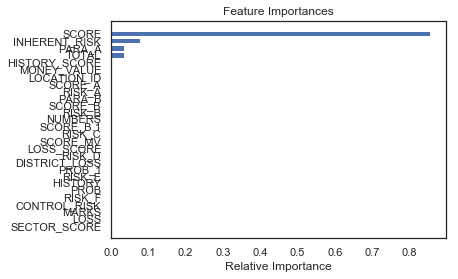

In [221]:
features=cols
importances = rf_c_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')




In [224]:
f = open('Group05.csv','a') 
line = 'Random Forest Reg' + str(rf_c_best.score(X_trainval,y_trainval)) + ',' + str(rf_c_best.score(X_test,y_test))+','+str('n_estimators= 20,max_features= 20')+'\n'
f.write(line)
f.close()

### Conclusion

After performing all the models, it is observed that all the models are giving an accuracy of 1.0 with very less or no miss-classifications. It is hard to comment on which model is the best as every model is giving the same results.